# Day 10 Challenge

The map indicates whether each position is empty (.) or contains an asteroid (#). The asteroids are much smaller than they appear on the map, and every asteroid is exactly in the center of its marked position. The asteroids can be described with X,Y coordinates where X is the distance from the left edge and Y is the distance from the top edge (so the top-left corner is 0,0 and the position immediately to its right is 1,0).

```
#.........
...A......
...B..a...
.EDCG....a
..F.c.b...
.....c....
..efd.c.gb
.......c..
....f...c.
...e..d..c
```

Bad constellations (columns/rows):

* +3/+1 (A)
* +3/+2 (B)
* +1/+3 (E)
* +2/+3 (D)
* +3/+3 (C)
* +4/+3 (G)

In [539]:
import pandas as pd
import matplotlib.pyplot as plt
from math import degrees, atan, pi
from numpy import sum

class StationDetector:
    
    def __init__(self):
        self._map = None
        self._asteroid_locations = []
        self._maplimit = None
        self._df = None
        
        # part 1
        self._asteroid_angles = {}
        self._asteroid_asteroids = {}
        self._asteroid_radius = {}
        
        # part 2
        self._shooting_df = None
        
    def load_data(self, file_location):
        with open(file_location, "r") as file:
            self._map = file.read()
        self._map = self._map.strip()
    
    def extract_asteroid_locations(self):
        line_count = 0
        for line in self._map.split("\n"):
            column_count = 0
            for item in list(line):
                if item == "#":
                    self._asteroid_locations.append((column_count, line_count))
                column_count += 1
            line_count += 1
        self._maplimit = (column_count, line_count)
        self._df = pd.DataFrame(self._asteroid_locations, columns=["x", "y"])
        
    def plot_map(self, mark=None, target=None):
        plt.figure(figsize=(10,10))
        if mark:
            plt.scatter(x=[mark[0]], y=[mark[1]], marker="o", color="orange", s=120)
        if target:
            plt.scatter(x=[target[0]], y=[target[1]], marker="o", color="lightgreen", s=120)
            plt.plot([mark[0], target[0]], [mark[1], target[1]], color="red")
        
        plt.scatter(x=self._df.x, y=self._df.y, marker="x", color="black", s=30)
        
    def collision_detection(self):
        
        i = 0
        angle_dict = {}
        radius_dict = {}

        for i in range(len(self._asteroid_locations)):

            list_copy = self._asteroid_locations.copy()
            element = list_copy[i]
            list_copy.remove(element)
            nelement = list_copy

            # current element
            x = element[0]
            y = element[1]

            angle_dict[element] = []
            radius_dict[element] = []
            self._asteroid_asteroids[element] = nelement

            for asteroid in nelement:
                xi = asteroid[0]-x
                yi = y-asteroid[1]
                ai = round(atan2(xi, yi),6)
                
                if ai < 0:
                    ai = pi + (pi-abs(ai))
                
                ri = (xi**2+yi**2)**0.5
                angle_dict[element].append(ai)
                radius_dict[element].append(ri)

        self._asteroid_angles = angle_dict
        self._asteroid_radius = radius_dict
            
    
    def count_collisions(self):
        
        self._asteroid_angles_cnt = {}
        
        for key in self._asteroid_angles.keys():
            
            outlist = []
            
            for value in self._asteroid_angles[key]:
                if value not in outlist:
                    outlist.append(value)
            
            self._asteroid_angles_cnt[key] = len(outlist)
    
    def return_max_collisions(self):
        l = []
        k = []
        for key in self._asteroid_angles_cnt.keys():
            l.append(self._asteroid_angles_cnt[key])
            k.append(key)
            
        return max(l), k[l.index(max(l))]
    

    def detect_shooting_order(self, asteroid=None, cutoff=400):
        self._shooting_df = pd.DataFrame({
            "radius": sd._asteroid_radius[asteroid],
            "angle": sd._asteroid_angles[asteroid],
            "target": sd._asteroid_asteroids[asteroid]
        })
        
        self._shooting_df.index=sd._asteroid_asteroids[asteroid]
        self._shooting_df = self._shooting_df.sort_values(["angle", "radius"])
        
        angles = self._shooting_df["angle"].values.copy()
        targets = self._shooting_df["target"].values.copy()
        
        shoot_list = []

        ca = None
        j = 0
        while True:

            if len(shoot_list) == len(targets):
                break
            
            if j == cutoff:
                break

            for i in range(len(angles)):

                if angles[i] != ca:
                    shoot_list.append(targets[i])
                    ca = angles[i]
                    angles[i] = -1.0

                i += 1
            j += 1
        return 100*shoot_list[199][0]+shoot_list[199][1], shoot_list[199]

## Part 1

Test files are:
* `day10.testa` (Best is 5,8 with 33 other asteroids detected)
* `day10.testb` (Best is 1,2 with 35 other asteroids detected)
* `day10.testc` (Best is 6,3 with 41 other asteroids detected)
* `day10.testd` (Best is 11,13 with 210 other asteroids detected)

Best location for station is (31, 20) with 319 possible observations.


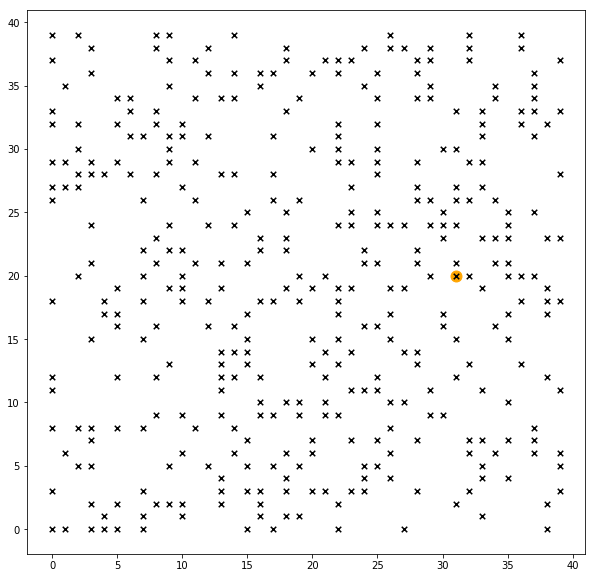

In [540]:
sd = StationDetector()

sd.load_data("day10.txt")
# sd.load_data("day10.testd")

sd.extract_asteroid_locations()
sd.collision_detection()
sd.count_collisions()
max_collisions, asteroid = sd.return_max_collisions()

print(f"Best location for station is {asteroid} with {max_collisions} possible observations.")

sd.plot_map(mark=asteroid)

## Part 2

The 200th object will be (5, 17), which means you can enter 517.


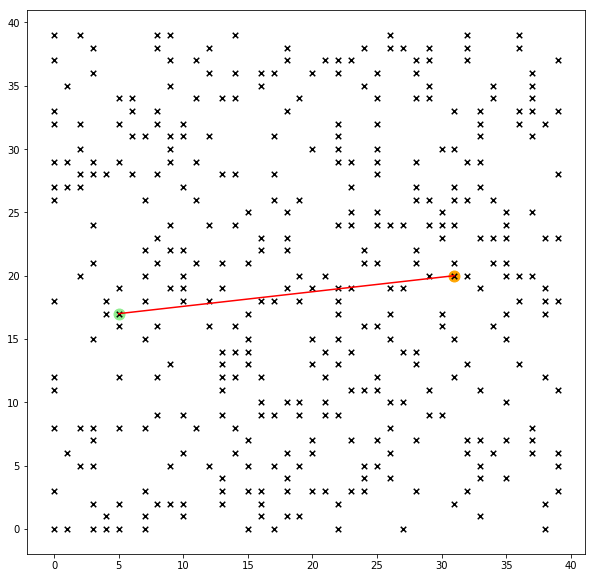

In [541]:
insertion_value, th_object = sd.detect_shooting_order(asteroid, cutoff=1000)

print(f"The 200th object will be {th_object}, which means you can enter {insertion_value}.")

sd.plot_map(mark=asteroid, target=th_object)

In [4]:
from math import atan2, pi

In [6]:
print(atan2(4,4))
print(atan2(-4,4))
print(atan2(4,-4))
print(atan2(-4,-4))

0.7853981633974483
-0.7853981633974483
2.356194490192345
-2.356194490192345


In [7]:
pi/4

0.7853981633974483

In [8]:
from matplotlib import pyplot as plt

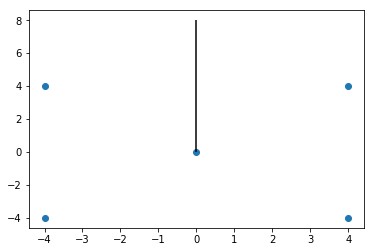

In [18]:
plt.scatter(x=[-4,-4,0,4,4], y=[-4,4,0,-4,4])
plt.vlines(x=0, ymax=8, ymin=0)
plt.show()